# timeseries

**Working with timeseries in pandas is a fullfilling to work with time-based data.**

This Cheatbook (Cheatsheet + Notebook) introduces you to the core functionality when working with pandas' time series / date functionality.


## References
* [API Reference](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html)

## Timestamp

Using just pandas' time data types is fun. Pandas provides intuitive ways for working with time data.

### Single time objects
Let's create some Timestamps / point in time.

In [1]:
import pandas as pd
pd.Timestamp("today")

Timestamp('2021-03-26 12:08:02.749976')

You can put in some standard date formats. Pandas' will convert them accordingly.

In [2]:
new_years_dinner = pd.Timestamp("2020-01-01 19:00")
new_years_dinner

Timestamp('2020-01-01 19:00:00')

We can also create relative time information

In [3]:
time_needed_to_sober_up = pd.Timedelta("1 day")
time_needed_to_sober_up

Timedelta('1 days 00:00:00')

We can also do calculations with thos objects.

In [4]:
completely_sober = new_years_dinner + time_needed_to_sober_up
completely_sober

Timestamp('2020-01-02 19:00:00')

### Time series
We can work with a list of time-based data, too. Here we use pandas' `date_range` method to create such a list (with `m` for end of months).

In [5]:
dates = pd.DataFrame(
            pd.date_range("2020-03-01", periods=5, freq="m"),
            columns=["day"]
        )
dates

,day
0,2020-03-31
1,2020-04-30
2,2020-05-31
3,2020-06-30
4,2020-07-31


With this, we calculate with time in a similar way as above.

In [6]:
dates["day_after_tomorrow"] = dates['day'] + pd.Timedelta("2 days")
dates

,day,day_after_tomorrow
0,2020-03-31,2020-04-02
1,2020-04-30,2020-05-02
2,2020-05-31,2020-06-02
3,2020-06-30,2020-07-02
4,2020-07-31,2020-08-02


## DateTimeProperties object

Especially the `DateTimeProperties` object contains time related data as attributes or methods that we can use.

In [7]:
dt_properties = dates['day'].dt
dt_properties

Let's take a look the some of the properties.

In [8]:
# this code is just for demonstration purposes and not needed in an analysis
[x for x in dir(dt_properties) if not x.startswith("_")]

['ceil',
 'date',
 'day',
 'day_name',
 'dayofweek',
 'dayofyear',
 'days_in_month',
 'daysinmonth',
 'floor',
 'freq',
 'hour',
 'is_leap_year',
 'is_month_end',
 'is_month_start',
 'is_quarter_end',
 'is_quarter_start',
 'is_year_end',
 'is_year_start',
 'microsecond',
 'minute',
 'month',
 'month_name',
 'nanosecond',
 'normalize',
 'quarter',
 'round',
 'second',
 'strftime',
 'time',
 'timetz',
 'to_period',
 'to_pydatetime',
 'tz',
 'tz_convert',
 'tz_localize',
 'week',
 'weekday',
 'weekofyear',
 'year']

We can e.g. call the method `day_name()` on a date time series to get the name of the day for a date.

In [9]:
dt_properties.day_name()

0     Tuesday
1    Thursday
2      Sunday
3     Tuesday
4      Friday
Name: day, dtype: object

## Timestamp Series
Let's work with some real data (or at least a part of it). 

### Example Scenario
The following dataset is an excerpt from a change log of a software. We want to take a look at which hour of the day the changes are made to the software.

#### First try

We can read in time-based datasets as any other dataset.

In [10]:
change_log = pd.read_csv("datasets/change_history.csv")
change_log.head()

,timestamp
0,2017-01-01 11:11:39
1,2017-01-01 13:18:26
2,2017-01-01 16:01:37
3,2017-01-01 19:02:45
4,2017-01-01 20:47:01


Note, if we import a dataset like this, the time data will be of a simple object data type.

In [11]:
change_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   timestamp  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


So we have to convert that data first into a time-based data type with pandas' `to_datetime()` function.

In [12]:
change_log['timestamp'] = pd.to_datetime(change_log['timestamp'])
change_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.9 KB


Next, we want to see at whick hour of the day most changes were done. We can use the same strategies to get more detailed information like in the previous examples.

In [13]:
change_log['hour'] = change_log['timestamp'].dt.hour
change_log.head()

,timestamp,hour
0,2017-01-01 11:11:39,11
1,2017-01-01 13:18:26,13
2,2017-01-01 16:01:37,16
3,2017-01-01 19:02:45,19
4,2017-01-01 20:47:01,20


Let's simply count the number of changes per hour.

In [14]:
changes_per_hour = change_log['hour'].value_counts(sort=False)
changes_per_hour.head()

0    29
1    10
2     8
4     2
6    11
Name: hour, dtype: int64

And create a little bar chart.

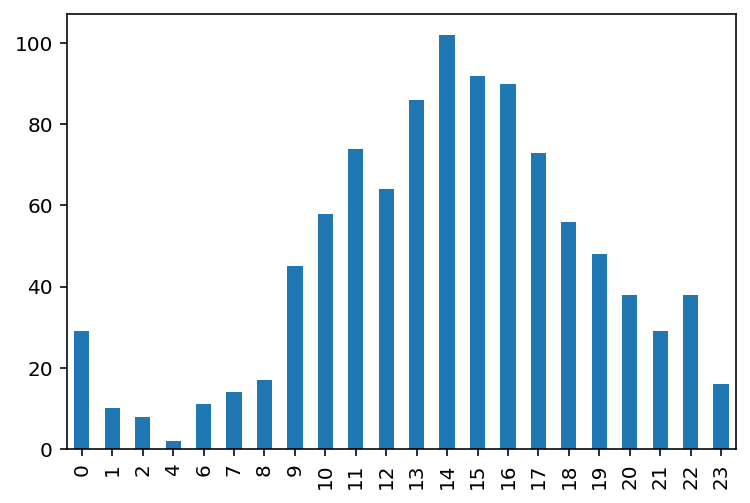

In [15]:
changes_per_hour.plot.bar();

At the first glance, this looks pretty fine. But there is a problem: Missing data. E.g. at 3am and 5am, there weren't any changes.

We can handle this by using the more advanced `resample` functionality of pandas. This allows us to determine at which frequency we summarize time-based data.

#### Second try: resampling time
For this, we create a time series Dataframe from the dataset again. This time, we import the dataset by additionally using the `parse_dates` keyword and the number of the column that contains dates. This would lead to an converted date column from the beginning.

In [16]:
change_log = pd.read_csv("datasets/change_history.csv", parse_dates=[0], index_col=0)
change_log.head()

""
timestamp
2017-01-01 11:11:39
2017-01-01 13:18:26
2017-01-01 16:01:37
2017-01-01 19:02:45
2017-01-01 20:47:01


In [17]:
change_log['changes'] = 1
change_log.head()

,changes
timestamp,
2017-01-01 11:11:39,1
2017-01-01 13:18:26,1
2017-01-01 16:01:37,1
2017-01-01 19:02:45,1
2017-01-01 20:47:01,1


Now we are able to apply the `resample` function on it with the information that we want to group our data hourly. We also have to decided what we want to do with the 

In [18]:
hourly_changes = change_log.resample("h").count()
hourly_changes.head()

,changes
timestamp,
2017-01-01 11:00:00,1
2017-01-01 12:00:00,0
2017-01-01 13:00:00,1
2017-01-01 14:00:00,0
2017-01-01 15:00:00,0


In [19]:
hourly_changes['hour'] = hourly_changes.index.hour
hourly_changes.head()

,changes,hour
timestamp,,
2017-01-01 11:00:00,1,11
2017-01-01 12:00:00,0,12
2017-01-01 13:00:00,1,13
2017-01-01 14:00:00,0,14
2017-01-01 15:00:00,0,15


In [20]:
changes_per_hour = hourly_changes.groupby("hour").sum()
changes_per_hour.head()

,changes
hour,
0,29
1,10
2,8
3,0
4,2


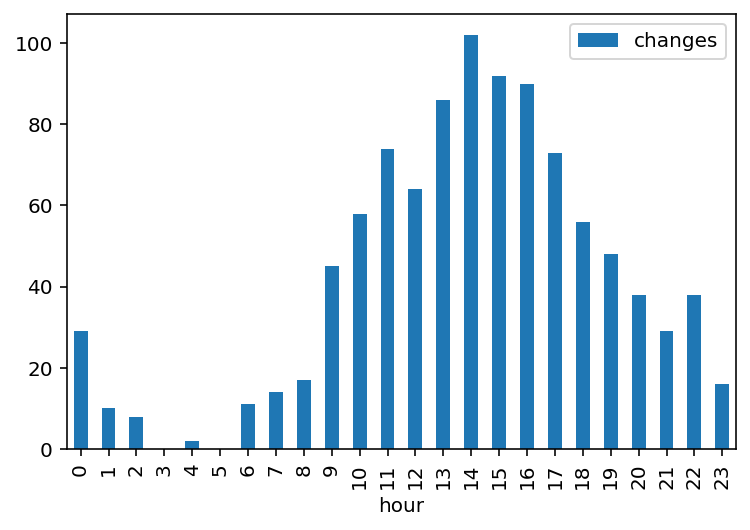

In [21]:
changes_per_hour.plot.bar();

## Display progressions

In [22]:
hourly_changes.head()

,changes,hour
timestamp,,
2017-01-01 11:00:00,1,11
2017-01-01 12:00:00,0,12
2017-01-01 13:00:00,1,13
2017-01-01 14:00:00,0,14
2017-01-01 15:00:00,0,15


In [23]:
accumulated_changes = hourly_changes[['changes']].cumsum()
accumulated_changes.head()

,changes
timestamp,
2017-01-01 11:00:00,1
2017-01-01 12:00:00,1
2017-01-01 13:00:00,2
2017-01-01 14:00:00,2
2017-01-01 15:00:00,2


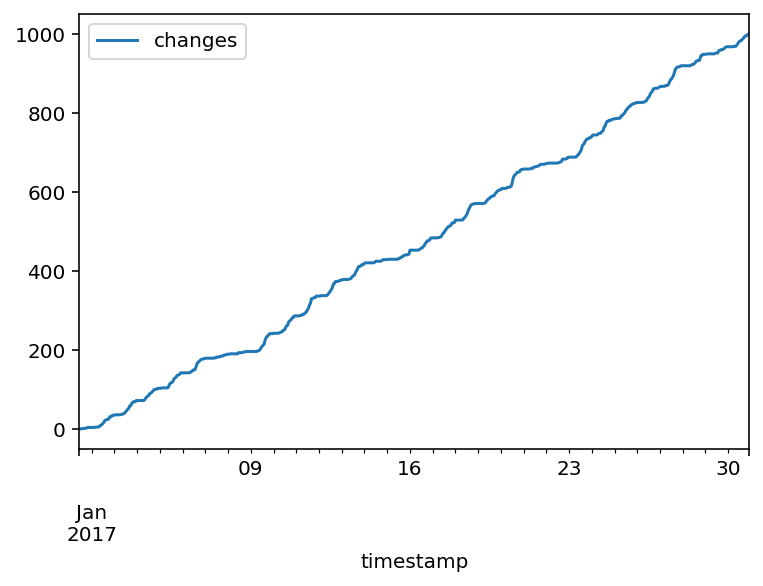

In [24]:
accumulated_changes.plot();

## Grouping time and data
So far, we did group only on time-based data. But what if we want, e.g., group the weekly changes by each developer? Let's do this!

Once again, we read in the dataset that we already know. We only let pandas parse the timestamp information.

In [25]:
change_log = pd.read_csv("datasets/change_history.csv", parse_dates=[0])
change_log.head() 

,timestamp
0,2017-01-01 11:11:39
1,2017-01-01 13:18:26
2,2017-01-01 16:01:37
3,2017-01-01 19:02:45
4,2017-01-01 20:47:01


For this scenario, we also need some developers.

In [26]:
devs = pd.Series(["Alice", "Bob", "John", "Steve", "Yvonne"])
devs

0     Alice
1       Bob
2      John
3     Steve
4    Yvonne
dtype: object

Let's add some artificial ones to the changes and also mark each change with a separate column.

In [27]:
change_log['dev'] = devs.sample(len(change_log), replace=True).values
change_log['changes'] = 1
change_log.head()

,timestamp,dev,changes
0,2017-01-01 11:11:39,Yvonne,1
1,2017-01-01 13:18:26,Bob,1
2,2017-01-01 16:01:37,Bob,1
3,2017-01-01 19:02:45,Bob,1
4,2017-01-01 20:47:01,Steve,1


OK, we want to group the changes per week per developer to find out the most active developer of the week (if this makes sense is up to you to find out ;-).

For this, we use `groupby` with a pandas `Grouper`. With the `Grouper`, we can say which column we want to group at which frequency (seconds, minutes, ... , years and so on). In our case: weekly. Additionally, we want to track which developer did how many weekly changes. So we take developers also in the list with the relevant information that should be grouped and sum up the changes accordingly.

In [28]:
weekly_changes_per_dev = \
    change_log.groupby([
        pd.Grouper(key='timestamp', freq='w'),
        'dev']) \
    .sum()
weekly_changes_per_dev.head()

changes
timestamp  dev            
2017-01-01 Bob           3
           Steve         1
           Yvonne        1
2017-01-08 Alice        44
           Bob          36

This give as a Dataframe which lists the number of changes per week for each developers. We sort this list to get a kind of "most active developer per week list":

In [29]:
weekly_changes_per_dev.sort_values(
    by=['timestamp', 'changes'],
    ascending=[True, False])

changes
timestamp  dev            
2017-01-01 Bob           3
           Steve         1
           Yvonne        1
2017-01-08 Alice        44
           John         40
           Steve        38
           Bob          36
           Yvonne       34
2017-01-15 Bob          69
           John         53
           Yvonne       50
           Steve        40
           Alice        34
2017-01-22 Yvonne       59
           Alice        58
           Steve        50
           Bob          41
           John         37
2017-01-29 Alice        67
           Bob          56
           Yvonne       53
           Steve        52
           John         51
2017-02-05 John         11
           Alice         7
           Yvonne        7
           Bob           4
           Steve         4

## Summary

This Cheatbook guided you through several time series use cases. I hope you find this a good starting point for your own data analysis with time-based data!